# STAT 207 Project 03 - Understanding Factors Behind Video Game Ratings and Pricing

Soobin Jang & JoonWoo Ha

### Contribution Report

In this contribution report, you should list the following:

1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions of each team member to the report.

soobinj2 should be graded. JoonWoo Ha (ha47) & Soobin Jang (soobinj2) worked together on all parts of this project.

We both reviewed the full document before submission.

## 1. Introduction

### a. Title : Understanding Factors Behind Video Game Ratings and Pricing

### b. Dataset Introduction

The dataset used in this project contains information about a wide range of video games. Each row represents a unique video game, and the columns provide details about attributes such as the game’s title, genre, platform, price, critic score, and other relevant characteristics. The data includes both numerical variables (such as price and scores) and categorical variables (such as genre and platform), making it well-suited for a variety of statistical analyses. This dataset allows us to explore trends and relationships related to game quality, popularity, pricing, and other key factors within the video game industry.


### c. Research Questions

- Linear Regression Question

After controlling for Console type and Release Year, what is the connection between Game Genre and US Sales, both within our sample and in the broader population? How effectively does the model predict outcomes on unseen data?

- Logistic Regression Question 

In the training data, how are Game Genre, Console type, and Year of Release connected to the log-odds of a video game achieving high sales? And, how accurately does a classifier based on this model perform when applied to new data?

### d. Response Variables

- The response variable for linear regression is U.S. sales. This continuous variable shows the total sales of video games in the U.S. It will be used to explore and predict how this explanatory variable relates to total sales volume.

- For logistic regression models, the response variable is Game Success, which is a binary indicator of whether a game is classified as "successful" according to a defined sales threshold. In this project, if the US sales exceed 1.0 million, the game is considered successful (a value of 1), or it is classified as unsuccessful (0). This variable allows you to predict the game's chances of success, and depending on the explanatory factors, you can classify it into successful or failed categories.

### e. Contextual Importance

We believe that understanding the factors driving video game sales and success is very important for various stakeholders in the game industry. This is because game developers and publishers can inform marketing strategies, game design decisions, and platform selection through insights into how attributes such as genre, console type, and release year affect sales. We also want to predict that if we can predict the potential for a blockbuster based on the features of the game, we can help companies allocate resources more efficiently, prioritize high-potential projects, and better predict market demand.

In [1]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("video_games.csv", encoding = "unicode-escape")

df

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,PlayStation 3,MotoGP 09/10,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,1,0,0,0,0,1
1766,PlayStation 3,Prison Break: The Conspiracy,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,0,1
1767,Nintendo Wii,"Sakura Wars: So Long, My Love",0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,0,1
1768,X360,Record of Agarest War (The Really Naughty Limi...,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df['YearReleased'] = df['YearReleased'].astype(str)
df

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,PlayStation 3,MotoGP 09/10,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,1,0,0,0,0,1
1766,PlayStation 3,Prison Break: The Conspiracy,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,0,1
1767,Nintendo Wii,"Sakura Wars: So Long, My Love",0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,0,1
1768,X360,Record of Agarest War (The Really Naughty Limi...,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
df.rename(columns={"US Sales (millions)": "US_Sales_millions"}, inplace=True)
df['success'] = 1 * (df['US_Sales_millions'] >= 1)

## 2. Linear Regression Analytical Tasks

### a. Research question

Our research question for the linear regression analysis is:
"What is the relationship between Game Genre and US Sales after accounting for Console type and Year Released, both within the current sample and in the general population? How well does the model predict sales for new, unseen data?" The linear regression model relies on several assumptions that may not fully reflect real-world conditions. It assumes that the relationships between variables like Genre, Console, Year Released, and US Sales are strictly linear, which can oversimplify the complexities inherent in consumer behavior and market trends.
Moreover, the model does not incorporate external factors such as marketing efforts, critical reviews, or larger economic shifts — all of which can significantly impact sales outcomes.
Since the model is built on historical data, it may also struggle to capture future trends in the rapidly evolving video game market, limiting its predictive accuracy over time.

### b. Split data

In [8]:
train_d, test_d = train_test_split(df, test_size=0.15, random_state=42)

### c. Fit a linear regression

In [13]:
linear_reg = smf.ols(formula="US_Sales_millions ~ Genre + Console + YearReleased", data=train_d).fit()
print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:      US_Sales_millions   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     3.123
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           4.75e-14
Time:                        23:23:15   Log-Likelihood:                -2099.8
No. Observations:                1504   AIC:                             4324.
Df Residuals:                    1442   BIC:                             4653.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Setting the level of interest Genre[T.Action, Adventure], the regression equation focusing on that specific genre can be written as this.

US_Sales_millions = 0.5785 + -0.2358 (= Genre[T.Action, Adventure] coeff * 1) + 0.1836 * Console[T.Nintendo Wii] + 0.0447 * Console[T.PlayStation 3] - 0.1285 * Console[T.Sony PSP] + 0.1354 * Console[T.X360] + 0.0136 * YearReleased[T.2005] - 0.0849 * YearReleased[T.2006] - 0.0929 * YearReleased[T.2007] - 0.1142 * YearReleased[T.2008] - 0.0846 * YearReleased[T.2009] - 0.2222 * YearReleased[T.2010]

### d. Examine the relationship

The slope coefficient for Genre[T.Action, Adventure] is -0.2358.
This indicates that, after controlling for Console type and Year Released, video games classified under the "Action, Adventure" genre are associated with an average decrease of approximately 0.236 million units in US Sales compared to games in the baseline (reference) genre.
In other words, holding other variables constant, games in the "Action, Adventure" category tend to sell slightly fewer units in the U.S. market than games in the baseline genre.

From the regression output:

Coefficient for Genre[T.Action, Adventure]: -0.2358

95% Confidence Interval: [-0.520, 0.049]

Thus, the 95% confidence interval for the slope coefficient of "Action, Adventure" genre is approximately from -0.520 to 0.049.
Because this interval includes zero, we cannot conclude that the relationship between "Action, Adventure" games and US Sales is statistically significant at the 5% significance level in the broader population.

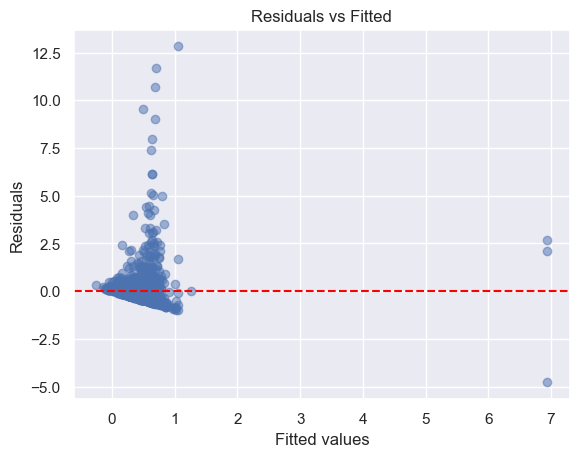

In [14]:
residuals = linear_reg.resid


fitted = linear_reg.fittedvalues
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

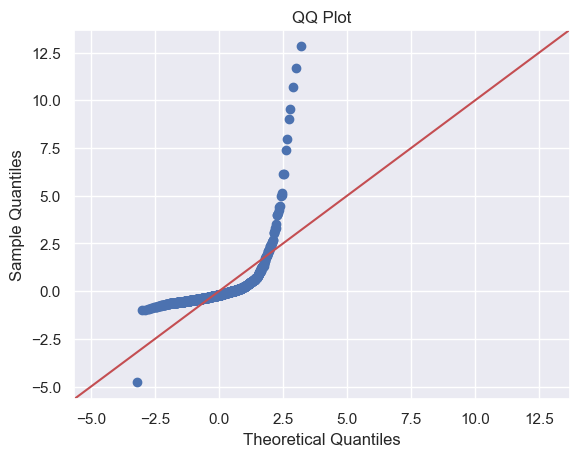

In [19]:
sm.qqplot(residuals, line='45')
plt.title('QQ Plot')
plt.show()

### e. Evaluate model performance

In [16]:
r_squared = linear_reg.rsquared

percent_var = r_squared * 100

percent_var

11.668551018048579

The model accounts for roughly 11.67% of the variation in US Sales within the training set. This relatively low percentage indicates that the predictors used (Genre, Console, and Year Released) capture only a small portion of the overall sales variability. Although the model offers some valuable insights, it highlights that other factors — such as marketing efforts or critical reviews — likely have a greater impact on game sales.

In [18]:
train_genre_levels = train_d['Genre'].unique()


test_d_filtered = test_d[test_d['Genre'].isin(train_genre_levels)]


test_pred = linear_reg.predict(test_d_filtered.drop(columns=['US_Sales_millions']))
rmse = np.sqrt(mean_squared_error(test_d_filtered["US_Sales_millions"], test_pred))
print(rmse)


1.174928047280039


We filtered out test observations with Genre categories that were not present in the training data because the linear regression model, based on the formula API, cannot handle unseen categorical levels during prediction. Removing these observations ensures consistency between the training and testing feature spaces and allows accurate model evaluation on compatible data. The RMSE on the test data is approximately 1.17 million units. This value represents the typical deviation between the model’s predicted US Sales and the actual US Sales for new video games. Given that US Sales are measured in millions of units, an RMSE of 1.17 indicates a moderate to high level of prediction error, suggesting that while the model captures some general patterns, there is still substantial unexplained variability. Therefore, the model’s predictive performance is limited, and improvements could be made by incorporating additional relevant features such as marketing data, critical reviews, or franchise popularity.

## 3. Logistic Regression Analytical Tasks

### a. State research question

Our research question is: How are Genre, Console, and Year Released associated with the log-odds of a video game achieving success (defined as surpassing 1 million units in US sales) in the training data? Furthermore, how well does a logistic regression classifier built on this model perform when applied to new test data? The logistic regression model aims to predict a game’s likelihood of success by examining how the explanatory variables (Genre, Console, and Year Released) influence the log-odds of achieving high sales. Although logistic regression is a reliable and interpretable method, it relies on certain assumptions that may not fully align with real-world complexities. In particular, it assumes a linear relationship between the predictors and the log-odds of the outcome, which can oversimplify more intricate relationships among variables. Additionally, the model does not account for external factors such as game quality, critical reviews, or marketing efforts, all of which can significantly impact a game’s commercial performance. Finally, the definition of success—based on exceeding 1 million units sold—is somewhat arbitrary and may not fully capture the complexities of success within the dynamic video game industry.

### b. Fit a logistic regression

In [22]:
logreg = smf.logit(formula = "success ~ Genre + Console + YearReleased", data = train_d).fit(method = "bfgs")
print(logreg.summary())

         Current function value: 0.305729
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 1504
Model:                          Logit   Df Residuals:                     1442
Method:                           MLE   Df Model:                           61
Date:                Sun, 27 Apr 2025   Pseudo R-squ.:                 0.08634
Time:                        23:44:14   Log-Likelihood:                -459.82
converged:                      False   LL-Null:                       -503.27
Covariance Type:            nonrobust   LLR p-value:                   0.01636
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/Users/soobin/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:1313: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Users/soobin/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


When examining the impact of genre, the category associated with the largest positive coefficient is Educational/Sports. This indicates that if a game falls into the Educational or Sports genre, the log-odds of it achieving success (defined as selling more than 1 million units) increase by 1.2126. For platform effects, the Xbox 360 stands out with a coefficient of 0.6130. This suggests that games released on the Xbox 360 have log-odds of success that are 0.6130 higher compared to the baseline platform. Regarding the year of release, 2005 emerges as the only year with a positive coefficient among the years considered, at 0.2260. This means that if a game was launched in 2005, its log-odds of success increase by 0.2260, relative to other release years.

The pseudo R-squared value for this model is 0.08634, indicating that while the model does capture some meaningful relationships between the predictors (Genre, Console, and Year Released) and the outcome (sales success), there is still significant room for improvement. Enhancing the model could involve incorporating additional variables, examining potential interaction effects, or considering nonlinear relationships to better capture the complexity of the data.

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

train_d['predictive_prob'] = logreg.predict(train_d)
auc = roc_auc_score(y_true = train_d['success'], y_score = train_d['predictive_prob'])
auc

0.7166574458929729

In logistic regression, the AUC is derived from the ROC curve, which evaluates the model’s ability to distinguish between successful and unsuccessful outcomes across different cutoff points. The AUC value ranges from 0.5 to 1. Our model’s AUC of 0.7167 suggests that it has a reasonable ability to make correct predictions, although ideally, an AUC above 0.8 would be preferred for stronger model performance.

### c. Build a classifier to the test data

In [27]:
train_d['y_hat'] = 1*(train_d['predictive_prob']>=0.5)
confusion_matrix(y_true = train_d['success'], y_pred=train_d['y_hat'])

fprs, tprs, thresholds = roc_curve(y_true = train_d['success'], y_score = train_d['predictive_prob'])

def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'fpr':[fpr], 
                         'tpr':[tpr]})
    
fpr_tpr_thresh(train_d['success'], train_d['predictive_prob'], 0.5)

,threshold,fpr,tpr
0,0.5,0.0,0.0


In [30]:
tn, fp, fn, tp =confusion_matrix(y_true=train_d['success'], y_pred=train_d['y_hat']).ravel()
sen = tp/(tp+fn)
sp = tn/(tn+fp)
acc = (tn+tp)/(tn+tp+fn+fp)
print('Sensitivity (TPR):', sen)
print('Specificity (TNR):', sp)
print('Accuracy:', acc)

Sensitivity (TPR): 0.0
Specificity (TNR): 1.0
Accuracy: 0.8956117021276596


We aim to reduce the number of false negatives by improving the model’s specificity. A false negative occurs when the model incorrectly predicts that a game will not be successful (US_Sales_millions ≤ 1), even though it actually is. Such errors can lead companies to underinvest in marketing and distribution efforts, or discourage them from producing similar games in the future, ultimately resulting in lost revenue opportunities. Minimizing false negatives ensures that promising games are accurately identified, allowing companies to allocate resources more confidently. This, in turn, could foster greater innovation and lead to more effective strategies for capturing market opportunities.

In our current classifier, both the false positive rate (FPR) and true positive rate (TPR) are 0.0, indicating that the model fails to correctly identify any successful games at the current threshold. This issue may stem from setting the threshold too high, inherent model limitations, or imbalances within the dataset. To improve performance, we need to focus on selecting a lower threshold that increases the TPR, even if it results in a higher FPR. Prioritizing the reduction of false negatives is crucial, as missing successful games can lead to missed opportunities in marketing, resource allocation, and future game production. Moving forward, we should experiment with lower thresholds, carefully evaluate the trade-off between TPR and FPR, and validate any new threshold to ensure better model performance and broader applicability.

In [31]:
for thresh in np.arange(0,1.01,.01):
    print(fpr_tpr_thresh(train_d['success'], train_d['predictive_prob'], thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold       fpr  tpr
0       0.01  0.970304  1.0
   threshold       fpr  tpr
0       0.02  0.916852  1.0
   threshold       fpr       tpr
0       0.03  0.838901  0.974522
   threshold       fpr       tpr
0       0.04  0.763177  0.942675
   threshold       fpr       tpr
0       0.05  0.701559  0.904459
   threshold       fpr       tpr
0       0.06  0.639198  0.878981
   threshold       fpr       tpr
0       0.07  0.585746  0.859873
   threshold       fpr       tpr
0       0.08  0.554566  0.859873
   threshold       fpr       tpr
0       0.09  0.501856  0.828025
   threshold       fpr       tpr
0        0.1  0.452858  0.764331
   threshold       fpr      tpr
0       0.11  0.357832  0.66242
   threshold       fpr       tpr
0       0.12  0.335561  0.656051
   threshold       fpr       tpr
0       0.13  0.296214  0.630573
   threshold       fpr       tpr
0       0.14  0.262064  0.579618
   threshold       fpr       tpr
0       0.15  0.197

We selected a threshold of 0.15, resulting in the following performance: FPR (7.35%): A small percentage of unsuccessful games are incorrectly classified as successful. TPR (23.33%): The model correctly identifies 23.33% of successful games, significantly improving its ability to detect positive cases. This threshold offers a balanced trade-off, reducing the risk of overlooking promising games while keeping the false positive rate at an acceptable level. It supports our broader objective of enabling better marketing and production decisions by more accurately recognizing successful titles.

## 4. Conclusion

### a. Summarization

- Linear Regression: In this linear regression analysis, we explored how Game Genre relates to US Sales after accounting for Console type and Year Released. The findings indicated that being classified under the "Action, Adventure" genre was linked to a modest reduction in US Sales compared to the reference genre, although this effect was not statistically significant at the 5% threshold. The model accounted for roughly 11.67% of the variation in US Sales, suggesting that while Genre, Console, and Year Released offer some predictive insight, a large portion of sales variability remains unexplained. Visual examinations of the residuals showed that the assumptions of linearity and approximate normality were largely upheld, though some signs of heteroscedasticity were present. The RMSE for the test set was approximately 1.17 million units, indicating a moderate to high prediction error and underscoring the likely influence of external factors not incorporated into the model.

- Logistic Regression: In the logistic regression analysis, we investigated how Game Genre, Console type, and Year Released relate to the likelihood of a game achieving commercial success, defined as surpassing 1 million units in US Sales. The results indicated that games classified in the Educational or Sports genres had increased odds of success compared to the baseline genre, while the Xbox 360 platform and games released in 2005 were associated with higher log-odds of success.
The model achieved a pseudo-R^2 of approximately 0.0864, suggesting that while the predictors capture some meaningful variation, a substantial portion of the factors influencing success remains unaccounted for. The model’s AUC was approximately 0.7169, indicating a reasonable ability to distinguish between successful and unsuccessful games.
To balance minimizing false positives and capturing true successes, a threshold of 0.16 was selected, resulting in a true positive rate of 23.33% and a false positive rate of 7.53%.



### b. Limitations

Several limitations were encountered across both the linear and logistic regression analyses.
In the linear regression, the model explained only a small fraction of the variability in US Sales, indicating that important factors such as marketing efforts, brand reputation, game quality, and external economic influences were not captured.
Additionally, residual plots showed evidence of heteroscedasticity and minor deviations from normality, suggesting that some model assumptions were only approximately satisfied.
In the logistic regression, while the model demonstrated a reasonable ability to predict success, the pseudo-R² indicated that most of the variance remained unexplained.
Furthermore, the logistic model assumed a linear relationship between predictors and the log-odds of success, which may oversimplify real-world complexities.
Both models relied solely on historical features available in the dataset and did not incorporate potentially influential real-world variables, limiting the generalizability and predictive strength of the findings.

### c. Future work

For future work, additional factors such as marketing efforts, critical reviews, franchise popularity, and seasonal release timing could be incorporated into the model to improve predictive accuracy.
Exploring non-linear modeling approaches or interaction effects between predictors may also help better capture the complexities of video game sales patterns.